In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
data = pd.read_csv("RTA Dataset.csv")

In [3]:
#Print the rows and columns of data

print("Head of the dataset:")
print(data.head())

print("Tail of the dataset:")
print(data.tail())

Head of the dataset:
       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Ow

# Question 1: How many rows and columns are in the dataset?

In [4]:
rows, columns = data.shape
rows, columns

(12316, 32)

# Question 2: What are the unique days of the week in the dataset?

In [8]:
#Unique() method returns the values in the order theu first appear in the dataset
unique_days = data['Day_of_week'].unique()
unique_days

array(['Monday', 'Sunday', 'Friday', 'Wednesday', 'Saturday', 'Thursday',
       'Tuesday'], dtype=object)

In [9]:
#To print in the order wise
ordered_days = sorted(data['Day_of_week'].unique(), key=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'].index)
ordered_days

['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Question 3: What is the count of accidents by each day of the week?

In [10]:
accidents_per_day = data['Day_of_week'].value_counts()
accidents_per_day

Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: Day_of_week, dtype: int64

# Question 4: What are the unique types of vechicles involved in accidents?

In [11]:
#.dropna() to exclude missing value (NaN)
unique_vehicles = data['Type_of_vehicle'].dropna().unique()
unique_vehicles

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)',
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [12]:
#Without using .dropna()
unique_vehicles = data['Type_of_vehicle'].unique()
unique_vehicles

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', nan,
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

# Question 5: What is the most common age group of drivers involved in accidents?

In [13]:
most_common_age_group = data['Age_band_of_driver'].value_counts().idxmax()
most_common_age_group

'18-30'

# Question 6: What is the average number of casualties per accident?

In [24]:
average_casualties = data['Number_of_casualties'].mean()
average_casualties

1.548148749594024

# Question 7: How many accidents occurred under "Clear" weather conditions?

In [27]:
clear_weather_accidents = data[data['Weather_conditions'] == 'Clear'].shape[0]
clear_weather_accidents

0

# Question 8: What is the distribution of accident severity (eg: Slight Injury, Serious Injury, Fatal)?

In [28]:
severity_distribution = data['Accident_severity'].value_counts()
severity_distribution

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

# Question 9: How many accidents involved more than 2 vehicles?

In [29]:
accidents_more_than_two = data[data['Number_of_vehicles_involved'] > 2].shape[0]
accidents_more_than_two

1980

# Question 10: What are the top 3 most common causes of accidents?

In [30]:
top_causes = data['Cause_of_accident'].value_counts().head(3)
top_causes

No distancing                 2263
Changing lane to the right    1808
Changing lane to the left     1473
Name: Cause_of_accident, dtype: int64

# Question 11: What is the distribution of accidents across dofferent days of the week?

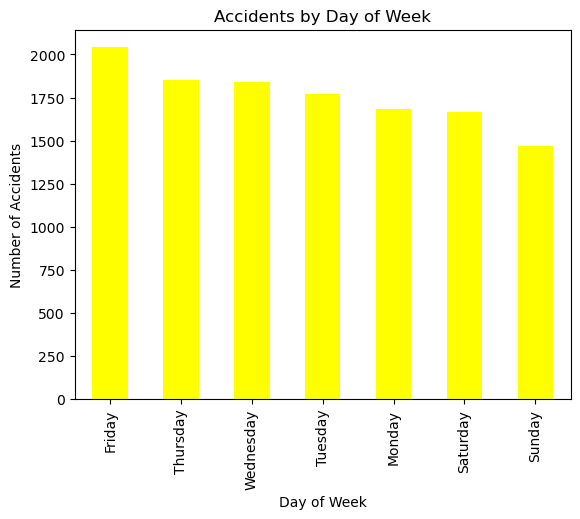

In [32]:
data['Day_of_week'].value_counts().plot(kind='bar', color='yellow')
plt.title('Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()

# Question 12: What is the distribution of vehicle types involved in accidents? (Pie Chart)

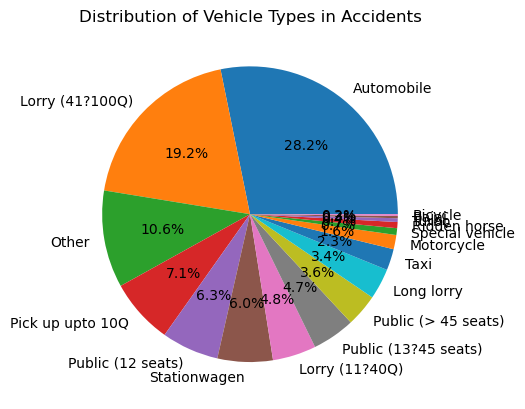

In [33]:
data['Type_of_vehicle'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Vehicle Types in Accidents')
plt.ylabel('')  #Hide the ylabel for better presentation
plt.show()

# Question 13: how does the number of casualties vary with the type of accident severity? (Box Plot)

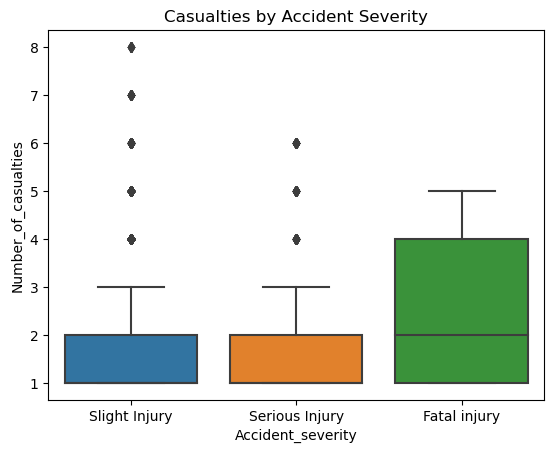

In [34]:
sns.boxplot(x='Accident_severity', y='Number_of_casualties', data=data)
plt.title('Casualties by Accident Severity')
plt.show()

# Question 14: What is the correlation between the number of vehicles involved and the number of casualties? (Scatter plot)

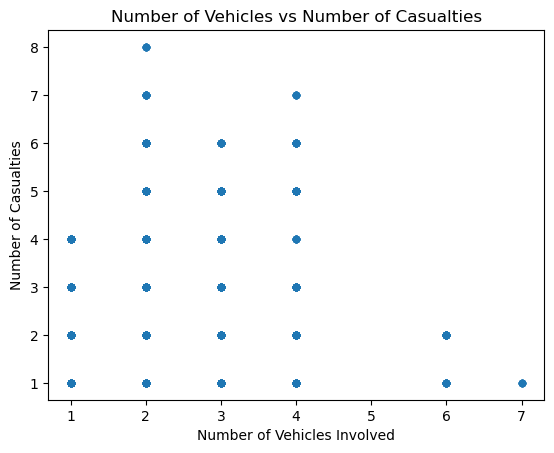

In [35]:
data.plot.scatter(x='Number_of_vehicles_involved', y='Number_of_casualties')
plt.title('Number of Vehicles vs Number of Casualties')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Number of Casualties')
plt.show()

# Question 15: How many accidents happened cause different genders? (Bar plot)

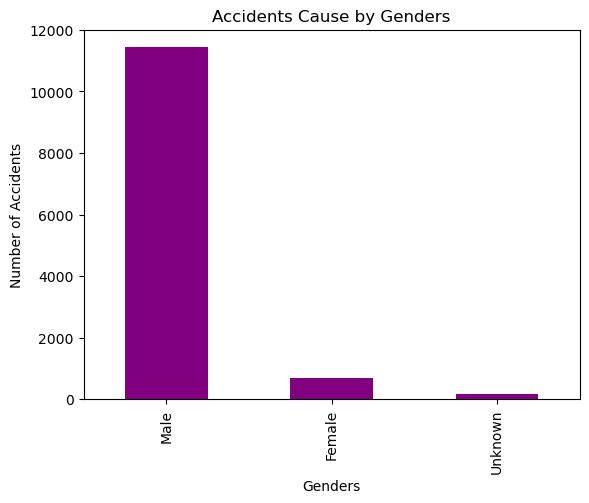

In [40]:
data['Sex_of_driver'].value_counts().plot(kind='bar', color='purple')
plt.title('Accidents Cause by Genders')
plt.xlabel('Genders')
plt.ylabel('Number of Accidents')
plt.show()

# Question 16: What is the relationship between age bands of drivers and the accidents severity? (Heatmap)

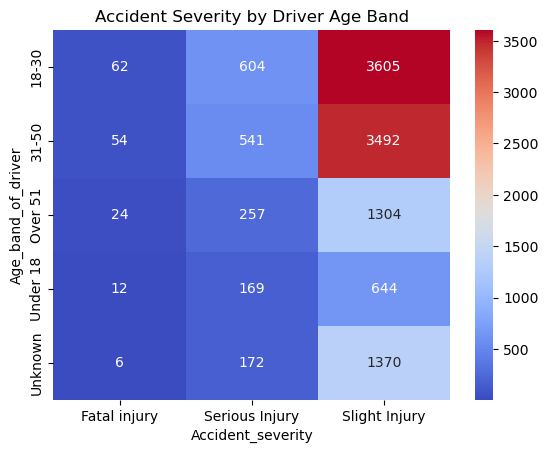

In [45]:
accident_severity_by_age = pd.crosstab(data['Age_band_of_driver'], data['Accident_severity'])
sns.heatmap(accident_severity_by_age, annot=True, cmap='coolwarm', fmt='d')
plt.title('Accident Severity by Driver Age Band')
plt.show()

# Question 17: What are the accident counts for different types of vehicle movements? (Bar plot)

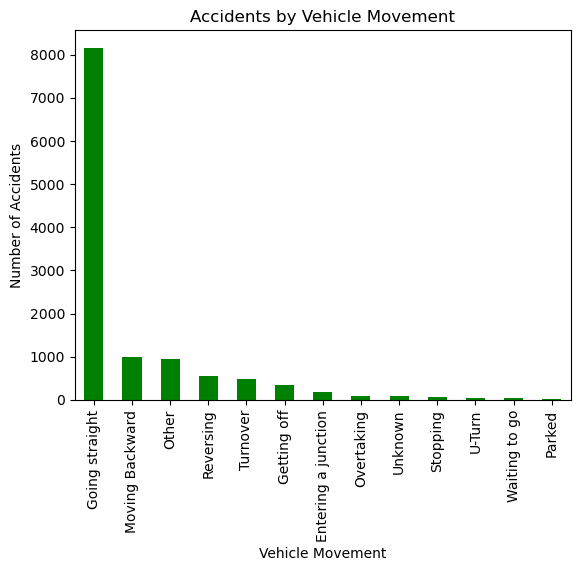

In [47]:
data['Vehicle_movement'].value_counts().plot(kind='bar', color='green')
plt.title('Accidents by Vehicle Movement')
plt.xlabel('Vehicle Movement')
plt.ylabel('Number of Accidents')
plt.show()

In [ ]:
Question 18: What is the distribution of driving experience among drivers involved in accidents? (Bar plot)

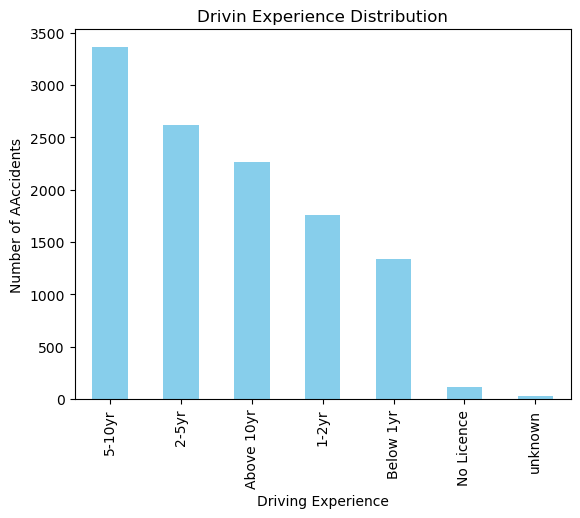

In [49]:
data['Driving_experience'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Drivin Experience Distribution')
plt.xlabel('Driving Experience')
plt.ylabel('Number of AAccidents')
plt.show()

In [ ]:
Question 19: How does the number of casualties differ nased on vehicle ownership? (Box plot)

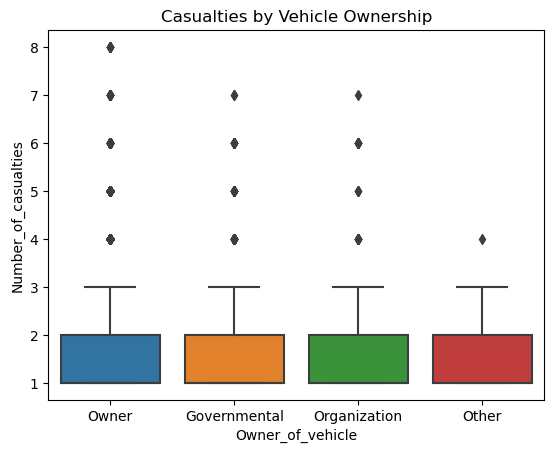

In [50]:
sns.boxplot(x='Owner_of_vehicle', y='Number_of_casualties', data=data)
plt.title('Casualties by Vehicle Ownership')
plt.show()

In [ ]:
Question 20: What is the relationship between accident severity and the time of day? (Line plot)

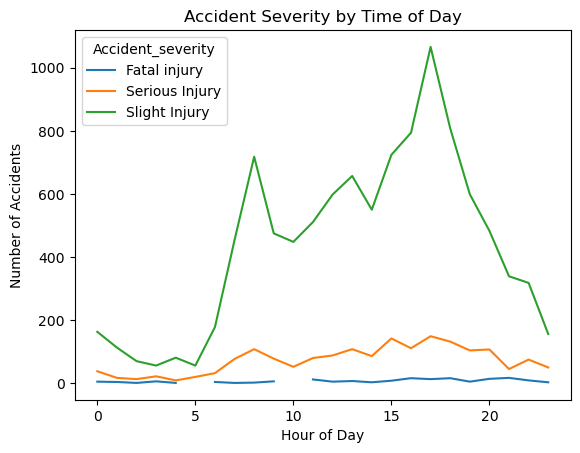

In [52]:
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour
severity_by_time = data.groupby(['Hour', 'Accident_severity']).size().unstack()
severity_by_time.plot(kind= 'line')
plt.title('Accident Severity by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()